<a href="https://colab.research.google.com/github/Yogi-Puvvala/Machine_Learning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SVC**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("drive/MyDrive/Colab_Projects/winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.quality.value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [6]:
df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [7]:
df["quality"] = df["quality"].apply(lambda x: 0 if x<6 else 1)

In [8]:
X = df.drop("quality", axis = 1)
y = df["quality"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
svc = Pipeline([
    ("scaler", StandardScaler()),
    ("model", SVC())
])

svc.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [11]:
print("Training Score:", svc.score(X_train, y_train))
print("Testing Score:", svc.score(X_test, y_test))

Training Score: 0.8021892103205629
Testing Score: 0.771875


In [12]:
print("Classification report:", classification_report(y_test, svc.predict(X_test)))

Classification report:               precision    recall  f1-score   support

           0       0.73      0.77      0.75       141
           1       0.81      0.77      0.79       179

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



# **SVR**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

In [14]:
df = pd.read_csv("drive/MyDrive/Colab_Projects/fish.csv")

In [15]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [16]:
df["Species"].value_counts()

,count
Species,
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [18]:
df.isna().sum()

,0
Species,0
Weight,0
Length1,0
Length2,0
Length3,0
Height,0
Width,0


In [19]:
X = df.drop("Weight", axis = 1)
y = df["Weight"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [21]:
nominal_cols = [col for col in X.columns if df[col].dtype == "O"]
numerical_cols = [col for col in X.columns if (df[col].dtype == "int64" or df[col].dtype == "float64")]

In [22]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("nom", OneHotEncoder(handle_unknown="ignore", sparse_output=False), nominal_cols)
])

In [23]:
svr = Pipeline([
    ("preprocess", preprocessor),
    ("model", SVR())
])

svr.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Length1', 'Length2',
                                                   'Length3', 'Height',
                                                   'Width']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Species'])])),
                ('model', SVR())])

In [24]:
print("Training Score:", svr.score(X_train, y_train))
print("Testing Score:", svr.score(X_test, y_test))

Training Score: 0.014310089555485406
Testing Score: -0.07585432903333489


♦ **Underfitting**

In [25]:
param_grid = {
    "model__C": [0.1, 1, 10, 100],
    "model__epsilon": [0.01, 0.1, 1],
    "model__kernel": ["rbf", "linear", "poly"],
    "model__gamma": ["scale", "auto"]
}

grid_svr = GridSearchCV(svr, param_grid, cv=5, scoring="r2", verbose=2, n_jobs=-1)
grid_svr.fit(X_train, y_train)

print("Best Params:", grid_svr.best_params_)
print("Best Training Score:", grid_svr.best_score_)
print("Test Score:", grid_svr.score(X_test, y_test))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Params: {'model__C': 100, 'model__epsilon': 0.1, 'model__gamma': 'scale', 'model__kernel': 'linear'}
Best Training Score: 0.8941627725518145
Test Score: 0.9377637994691921


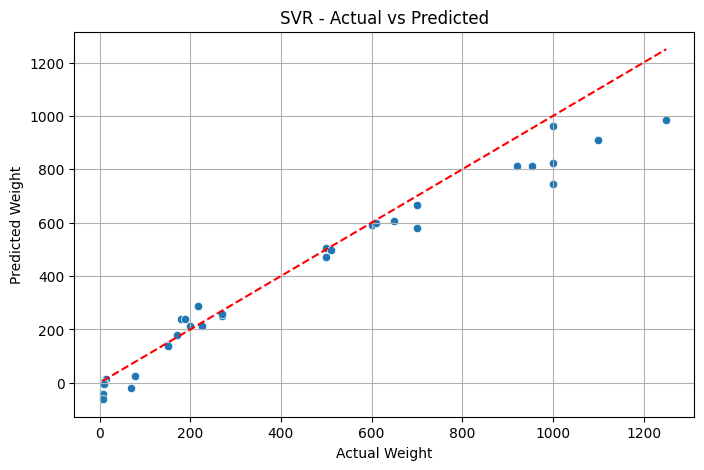

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = grid_svr.predict(X_test)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("SVR - Actual vs Predicted")
plt.grid(True)
plt.show()